In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.decomposition import PCA
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import FastICA
from sklearn.manifold import TSNE

# %cd '/content/drive/My Drive/CS 598'

/content/drive/My Drive/CS 598


In [2]:
def load_eeg(d):
    data = []
    labels = []
    for f in tqdm(range(1,33)):
        if(f < 10):
            s = '0'+str(f)
        else:
            s = str(f)
        tmp = pickle.load(open(d+'data_preprocessed_python/'+'s'+s+'.dat','rb'),encoding='latin1')
        data.append(tmp['data'])
        labels.append(tmp['labels'])
    ret = {'data':np.concatenate(data,axis=0),'labels':np.concatenate(labels,axis=0)}

    return ret

In [3]:
data = load_eeg('')

100%|██████████| 32/32 [03:28<00:00,  6.50s/it]


In [4]:
print(data['data'].shape)
print(data['labels'].shape)

(1280, 40, 8064)
(1280, 4)


In [5]:
d = np.reshape(data['data'], data['data'].shape[:-2] + (-1,))
l = data['labels']
print(d.shape, l.shape)

(1280, 322560) (1280, 4)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(d, l, test_size=0.20, random_state=42)

In [7]:
X_test.shape

(256, 322560)

In [40]:
accuracies = []
for k in range(1, 10):
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(X_train, y_train[:,0] < 5)
  y_predict = neigh.predict(X_test)
  accuracies.append(accuracy_score(y_test[:,0] < 5, y_predict) * 100)

Mean accuracy for k = 1 to 9 : 50.73784722222222


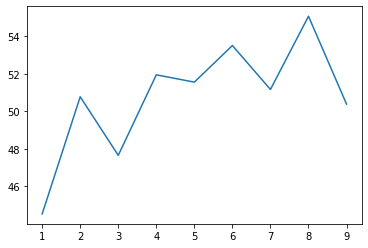

In [41]:
print("Mean accuracy for k = 1 to 9 :", np.mean(accuracies))
plt.plot(np.arange(1, 10), accuracies)
plt.show()

In [15]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
pca = PCA(n_components=1000)
X_train_pca = pca.fit_transform(X_train_norm)
print(np.sum(pca.explained_variance_ratio_))

0.9994910959251274


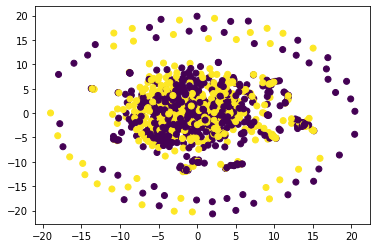

In [39]:
tsne = TSNE(n_components=2,early_exaggeration=20,learning_rate=1,init='random',n_jobs=8,perplexity=5)
X_train_pca_tsne = tsne.fit_transform(X_train_pca)
plt.scatter(X_train_pca_tsne[:,0], X_train_pca_tsne[:,1], c=(y_train[:,0] < 5))
plt.show()

In [19]:
X_test_norm = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_norm)

In [20]:
accuracies = []
for k in range(1, 10):
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(X_train_pca, y_train[:,0] < 5)
  y_predict = neigh.predict(X_test_pca)
  accuracies.append(accuracy_score(y_test[:,0] < 5, y_predict) * 100)

Mean accuracy for k = 1 to 9 : 54.904513888888886


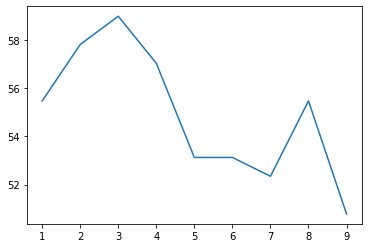

In [26]:
print("Mean accuracy for k = 1 to 9 :", np.mean(accuracies))
plt.plot(np.arange(1, 10), accuracies)
plt.show()

In [27]:
# print(confusion_matrix(((y_test[:,0] - 1.00001) / 3).astype(np.int), y_predict))

In [28]:
ica = FastICA(n_components=20, random_state=0)
X_train_ica = ica.fit_transform(X_train_norm)

(1024, 2)


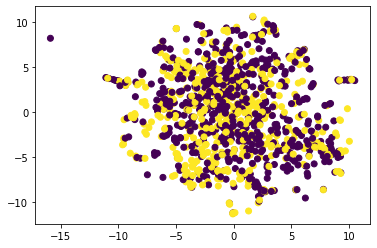

In [35]:
tsne = TSNE(n_components=2,early_exaggeration=20,learning_rate=1,init='random',n_jobs=8,perplexity=100)
X_train_ica_tsne = tsne.fit_transform(X_train_ica)
plt.scatter(X_train_ica_tsne[:,0], X_train_ica_tsne[:,1], c=(y_train[:,0] < 5))
plt.show()

In [31]:
X_test_ica = ica.transform(X_test_norm)

In [32]:
accuracies = []
for k in range(1, 10):
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(X_train_ica, y_train[:,0] < 5)
  y_predict = neigh.predict(X_test_ica)
  accuracies.append(accuracy_score(y_test[:,0] < 5, y_predict) * 100)

Mean accuracy for k = 1 to 9 : 58.854166666666664


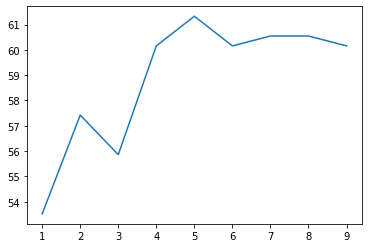

In [33]:
print("Mean accuracy for k = 1 to 9 :", np.mean(accuracies))
plt.plot(np.arange(1, 10), accuracies)
plt.show()